In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd

In [25]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [27]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [28]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [29]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [30]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [31]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [32]:
last_entry=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_entry

# Design a query to retrieve the last 12 months of precipitation data and plot the results

last_tweleve = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>="2016-08-23").\
        order_by(Measurement.date).all()
last_tweleve

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [33]:
# Calculate the date 1 year ago from the last data point in the database

last_year=dt.date(2017,8,23)-dt.timedelta(days=365)
last_year

datetime.date(2016, 8, 23)

In [34]:
# Save the query results as a Pandas DataFrame and set the index to the date column

climate_df=pd.DataFrame(last_tweleve)
climate_df.set_index('date').head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


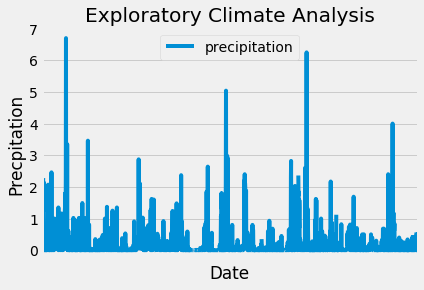

In [35]:
# Use Pandas Plotting with Matplotlib to plot the data

climate_df.plot('date','prcp')
plt.xlabel("Date")
plt.ylabel("Precpitation")
plt.title("Exploratory Climate Analysis")
plt.legend(["precipitation"])
plt.xticks([])
plt.show()

![precipitation](Images/precipitation.png)

In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data

climate_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [37]:
# Design a query to show how many stations are available in this dataset?

stations_count=session.query(Station).count()
print(f"There are {stations_count} stations available in this dataset")

There are 9 stations available in this dataset


In [38]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_list=(session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)
              .order_by(func.count(Measurement.station).desc()).all())
station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

active_station=station_list[0][0]
lowest_temp=session.query(func.min(Measurement.tobs)).filter(Measurement.station==active_station).all()
highest_temp=session.query(func.max(Measurement.tobs)).filter(Measurement.station==active_station).all()
average_temp=session.query(func.avg(Measurement.tobs)).filter(Measurement.station==active_station).all()
print(f"Lowest Temperature is : {lowest_temp}")
print(f"Highest Temperature is : {highest_temp} ")
print(f"Average Temperature is : {average_temp} ")

Lowest Temperature is : [(54.0,)]
Highest Temperature is : [(85.0,)] 
Average Temperature is : [(71.66378066378067,)] 


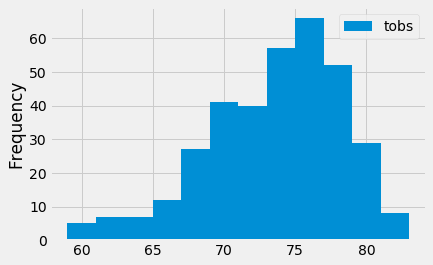

In [42]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_list_one=(session.query(Measurement.date,Measurement.tobs).filter(Measurement.date>last_year)
                  .filter(Measurement.station==active_station).order_by(Measurement.date).all())
station_list_one

station_df=pd.DataFrame(station_list_one)
station_df.set_index('date').head()

station_df.plot(kind='hist',bins=12)

![precipitation](Images/station-histogram.png)

In [43]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [44]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_temps=calc_temps('2016-08-23','2017-08-23')
trip_temps

[(58.0, 74.59058295964125, 87.0)]

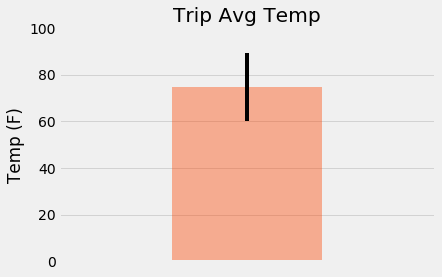

In [45]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

tmin=trip_temps[0][0]
tavg=trip_temps[0][1]
tmax=trip_temps[0][2]
error=tmax-tmin
plt.bar(0,tavg,yerr=error/2,color='orangered',alpha=.4)
plt.ylim(0,100)
plt.xlim(-1,1)
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.xticks([])
plt.grid(alpha=.8)

In [47]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel=([Station.station,Station.name,func.sum(Measurement.prcp),Station.latitude,Station.longitude,Station.elevation])
stationRain=(session.query(*sel).filter(Station.station==Measurement.station).filter(Measurement.date>='2016-08-23')
             .group_by(Station.station).order_by(func.sum(Measurement.prcp).desc()).all())
stationRain

stationRainTable=pd.DataFrame(np.array(stationRain))
stationRainTable



,0,1,2,3,4,5
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",147.81000000000006,21.3331,-157.8025,152.4
1,USC00519281,"WAIHEE 837.5, HI US",70.03000000000003,21.45167,-157.84888999999998,32.9
2,USC00513117,"KANEOHE 838.1, HI US",48.510000000000026,21.4234,-157.8015,14.6
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",38.01,21.33556,-157.71139,19.5
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",33.239999999999995,21.5213,-157.8374,7.0
5,USC00519397,"WAIKIKI 717.2, HI US",16.089999999999986,21.2716,-157.8168,3.0
6,USC00517948,"PEARL CITY, HI US",4.59,21.3934,-157.9751,11.9


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


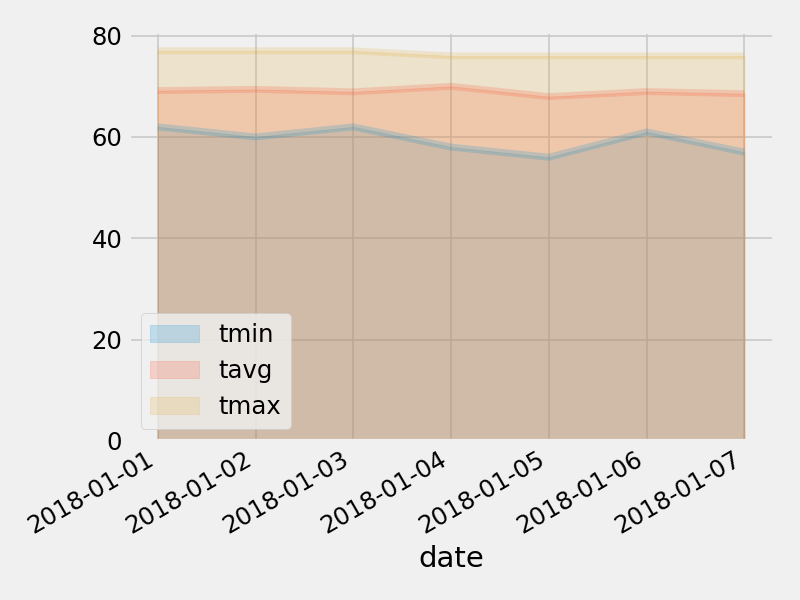

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
